In [1]:

#Objectives
#1. Load and preprocess the dataset
#2. Inspect the data for empty values, wrong datatypes, wrong formats, duplicates and outliers
#3. Analyse the data to find patterns and relationships
#4. Visualize the data to understand trends and distributions
#5. Evaluate the model performance using appropriate metrics
#6. Identify patterns and correlations.
#7. Save the cleaned and processed data for future use
#8. Report findings and insights
#9. Recommendations based on the analysis



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
# Load the dataset
df = pd.read_csv('climate_action_data.csv')

In [4]:
# Intial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [5]:
# More intial inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [6]:
# Empty values
# Check for missing values or null values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# For remaining missing dates, fill with mode
if df['Date'].isnull().sum() > 0:
    # Fill with mode date
    mode_date = df['Date'].mode()[0]
    df['Date'] = df['Date'].fillna(mode_date)

In [8]:
# Handle missing values
# For numerical columns, we can fill missing values with the mean or median
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())
        
# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
# Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())
        

Missing values after handling:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [9]:
df.dtypes

Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object

In [10]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nData types after cleaning:")
print(df.dtypes)


Missing values after cleaning:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Data types after cleaning:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [11]:
# Wrong Data Types
num_cols = ['Soil_Moisture', 'Soil_pH', 'Temperature', 'Humidity', 'Fertilizer_Recommended', 'Irrigation_Recommended']
for col in num_cols:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

In [12]:

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [20]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 798
Number of duplicate dates: 0


(798, 10)

In [21]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      798 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               798 non-null    float64       
 3   Soil_pH                        798 non-null    float64       
 4   Temperature(C)                 798 non-null    float64       
 5   Humidity(%)                    798 non-null    float64       
 6   Crop_Type                      798 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64       
 8   Irrigation_Recommended(mm)     798 non-null    float64       
 9   Drone_Image_ID                 798 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.6+ KB
Missing values after all


Exploratory Data Analysis

Descriptive Statistics for Numerical Variables:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            798        798.000000  798.000000   
mean   2026-02-04 07:45:33.834586624         44.827237    6.252487   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 06:00:00         26.970000    5.330000   
50%              2026-02-03 12:00:00         45.230000    6.292500   
75%              2026-08-23 18:00:00         62.642500    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.447709    1.021804   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      798.000000   798.000000                     798.000000   
mean        26.477694    60.117794                      87.420927   
min         18.000000    30.000000                      30.000000   
25%         22.32

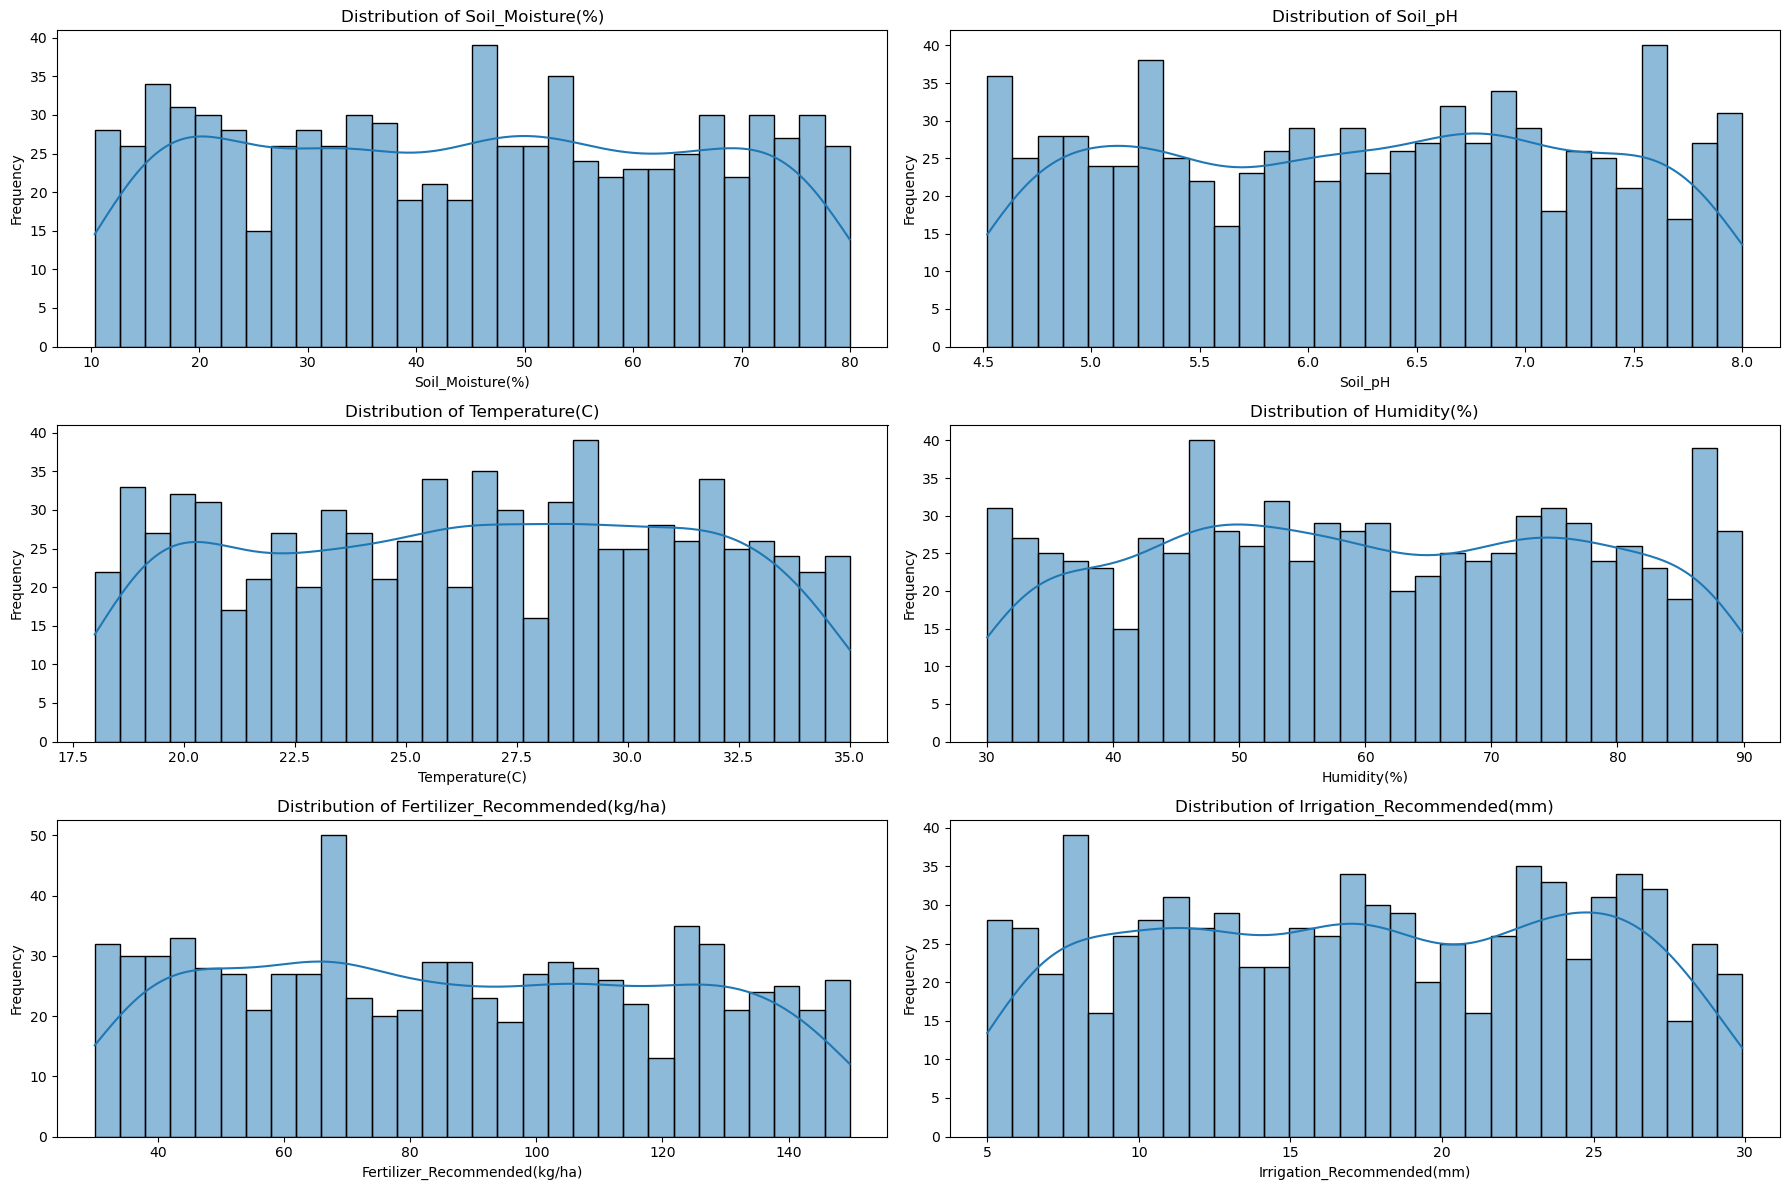

In [22]:
#Exploratory Data Analysis (EDA)

print("\nExploratory Data Analysis")

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Variables:")
print(df.describe())

# Visualizing distributions of the numeric variables using Histograms
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



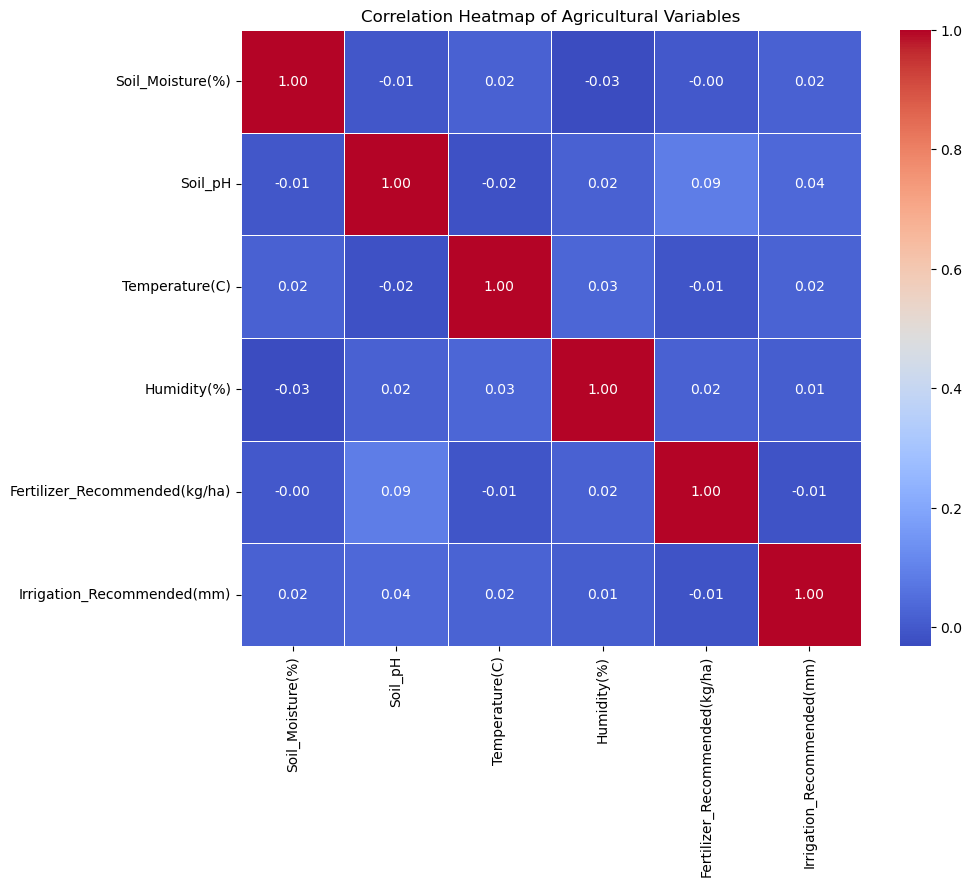

In [24]:
# Correlation Heatmap
correlation_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Agricultural Variables')
plt.show()

In [28]:
# Save to CSV 
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("Dataset successfully saved as 'cleaned_agricultural_data.csv'")

Dataset successfully saved as 'cleaned_agricultural_data.csv'


In [26]:
#Finding Insights and Recommendations

print("Insights and Recommendations:")

# Identify variables most influencing fertilizer recommendations
# Considering 'Fertilizer_Recommended' as an indicator of recommended fertilizers.
# We look at correlations with Fertilizer_Recommended.
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nCorrelation of the Variables with Fertilizer_Recommended:")
print(fertilizer_corr)

# Insights
print("\nFertilizer Recommendation Insights:")
# Exclude self-correlation and identify top correlated features
if fertilizer_corr.index[0] == 'Fertilizer_Recommended(kg/ha)':
    influencer1 = fertilizer_corr.index[1]
    correlation1 = fertilizer_corr.iloc[1]
    influencer2 = fertilizer_corr.index[2]
    correlation2 = fertilizer_corr.iloc[2]
else:
    influencer1 = fertilizer_corr.index[0]
    correlation1 = fertilizer_corr.iloc[0]
    influencer2 = fertilizer_corr.index[1]
    correlation2 = fertilizer_corr.iloc[1]

print(f"The variable most strongly correlated with fertilizer recommendation is '{influencer1}' (correlation: {correlation1:.2f}).")
print(f"Another significant factor is '{influencer2}' with a correlation of {correlation2:.2f}.")
print("These correlations imply these variables could be influencing how much fertilizer is being applied.")

# Find the crop with the highest mean soil moisture level
moisture_avg_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
top_crop_moisture = moisture_avg_by_crop.index[0]
top_moisture_value = moisture_avg_by_crop.iloc[0]
print(f"\nCrop with the highest average soil moisture: '{top_crop_moisture}' ({top_moisture_value:.2f}%)")

# Analyze high-temperature crop groups and suggest irrigation changes
average_temp_by_crop = df.groupby('Crop_Type')['Temperature(C)'].mean()
high_temp_crops = average_temp_by_crop[average_temp_by_crop > 30]

print("\nCrops facing average temperatures above 30°C – Suggested Irrigation Adjustments:")
if not high_temp_crops.empty:
    for crop, temp in high_temp_crops.items():
        moisture_level = df[df['Crop_Type'] == crop]['Soil_Moisture(%)'].mean()
        print(f"- {crop}: Avg Temp = {temp:.2f}°C, Avg Soil Moisture = {moisture_level:.2f}%")
        print("  → Recommendation: Increase watering intervals and amounts.")
        print("    Maintain ideal soil moisture (typically 60–80%) to offset heat stress.")
        print("    Opt for early morning or evening irrigation to reduce evaporative loss.")
else:
    print("No crops in the dataset show an average temperature above 30°C.")

# Broader precision farming suggestions
print("\nStrategic Recommendations for Smarter Agriculture:")
print("- Sensor Integration: Adopt IoT-based real-time monitoring for accurate soil and climate data.")
print("- Adaptive Fertilization: Use correlated features to inform real-time adjustments in fertilizer dosing.")
print("- Responsive Irrigation: Invest in smart irrigation setups that adjust based on live soil and climate metrics.")
print("- Custom Crop Profiles: Define ideal conditions per crop (moisture, pH, temperature, etc.) to guide input usage.")
print("- Data-Driven Yield Improvement: Investigate factors impacting yield and build predictive models to inform decisions.")


Insights and Recommendations:

Correlation of the Variables with Fertilizer_Recommended:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085570
Humidity(%)                      0.017062
Soil_Moisture(%)                -0.001722
Temperature(C)                  -0.008140
Irrigation_Recommended(mm)      -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Fertilizer Recommendation Insights:
The variable most strongly correlated with fertilizer recommendation is 'Soil_pH' (correlation: 0.09).
Another significant factor is 'Humidity(%)' with a correlation of 0.02.
These correlations imply these variables could be influencing how much fertilizer is being applied.

Crop with the highest average soil moisture: 'Wheat' (47.36%)

Crops facing average temperatures above 30°C – Suggested Irrigation Adjustments:
No crops in the dataset show an average temperature above 30°C.

Strategic Recommendations for Smarter Agriculture:
- Sensor Integration: Adopt IoT-ba